In [ ]:
import numpy as np
np.random.seed(999)
#we will load the iris data from scikit - learn package
from sklearn . datasets import load_iris
iris = load_iris ()
# check the shape of iris data
print ( iris . data . shape )
A = iris.data
# for j in range (A.shape[1]) :
#   A [: , j ] = A[: , j ]/ np . linalg . norm ( A[: , j ])
# check the shape of iris target
print ( iris.target.shape )
print

n = iris . data . shape [0] # Number of data points
d = iris . data . shape [1] # Dimension of data points
#In the following code , we create a nx1 vector of target labels
y = 1.0* np . ones ([ A . shape [0] ,])
#How many labels does iris data have ?
C=np.unique(iris.target)
print ('Number of lablels:',len(C))
for i in range ( iris . target . shape [0]) :
  if iris.target[i] != 1:
    y[i]=-1
  else:
    y[i]=1
print(y)
# y[i] = ???? # Convert class labels that are not 1 into -1
# Create an index array
indexarr = np . arange ( n ) # index array

np . random . shuffle ( indexarr ) # shuffle the indices

# check indexarr after shuffling
print('index_array:',indexarr)
B=[[] for _ in range(150)]
Y=1.0* np . ones ([ A . shape [0] ,])
#Use the first 80% of indexarr to create the train data and the remaining 20% to create the test data
for i in range(A.shape[0]):
  j=indexarr[i]
  B[i]=A[j].tolist()
  Y[i]=y[j]

# train_label=1.0*np.ones([120])
# test_label=1.0*np.ones([30])
# train_data=[[] for _ in range(120)]
# test_data=[[] for _ in range(30)]
# print(train_data))
# for i in range(150):
#   if i<120:
#     train_data[i]=(A[indexarr[i]])
#     train_label[i]=y[indexarr[i]]
#   if i>=120:
#     test_label[i-120]=y[indexarr[i]]
#     test_data[i-120]=(A[indexarr[i]])
train_data=np.array(B[:120])
test_data=np.array(B[120:])
train_label=Y[:120]
test_label=Y[120:]
print(f'train_data: {train_data.shape}')
print(f'train_label: {train_label.shape}')
print(f'test_data: {test_data.shape}')
print(f'test_label: {test_label.shape}')


(150, 4)
(150,)
Number of lablels: 3
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]
index_array: [ 61  64  80  40  36   0  44  82 126  17  26 143  28 134  60 104 149 111
 142  18  29   7  20 145  83  45 137 114 130 119 132 122  55  41 100  24
  68 131  53  65  97 120  37  90 108  73  12  77  19  10 138  74  35 123
  33  34  47  96 140 116  79  21   2  93  98 112 146  15  75  59  38  56
 135  89  86  91  85  51  30  39 148  22 124 109

image.png

To rewrite the optimization problem
$
\min_{w \in \mathbb{R}^d}
 f(w) = \frac{\lambda}{2} ||w||_2^2 + \frac{1}{n} \sum_{i=1}^{n} L(y_i, w^T x_i)
$
as
$
\min_{w} \sum_{i=1}^{n} f_i(w)
$

Find an appropriate choice of $f_i(w)$, where

$
f_i(w) = \frac{\lambda}{2n} ||w||_2^2 + L(y_i, w^T x_i)/n
$

Here, $L(y_i, w^T x_i)$ is the loss function applied to the $i$-th data point. The summation over $i$ will then represent the average loss over the entire dataset. Therefore, the optimization problem becomes
$
\min_{w} \sum_{i=1}^{n} f_i(w) = \min_{w} \sum_{i=1}^{n} \left( \frac{\lambda}{2n} ||w||_2^2 + L(y_i, w^T x_i) /n\right)
$


This form allows us to treat each individual data point's loss term separately, which can be useful for certain optimization algorithms.


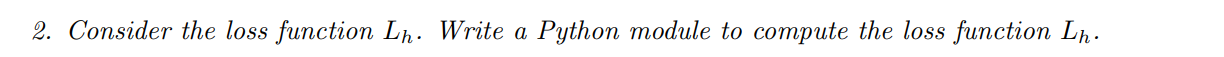

In [ ]:
def hinge(x,y,w):
  hinge= np.maximum(0,1-y*(w@x))
  return hinge

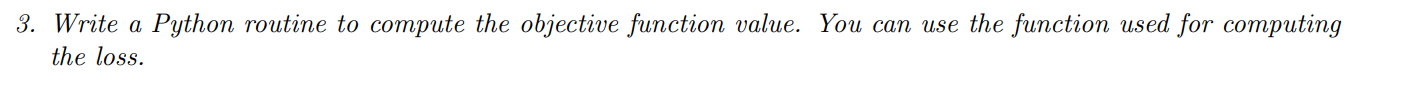

In [ ]:
# #for single data value
# def predict(x,y,w):
#   hing=hinge(x,y,w)
#   if np.sign(hing)>0:#biased for value of y =1
#     y=1
#   else:
#     y=-1
#   return y

In [ ]:
def predict(w,x):
  predict=[]
  for i in range(x.shape[0]):

    wx=w@x[i]

    a=(np.sign(wx))
    if a>0:
      predict.append(1)
    else:
      predict.append(-1)
  return predict

In [ ]:
# #for single data value
# def compute_accuracy(data,label,w):
#   count=0
#   for i in range(len(data)):
#     pre=predict(data[i],label[i],w)

#     if pre==label[i]:
#       count=count+1
#   acc=count/len(label)
#   return acc

In [ ]:
def compute_accuracy(data,labels,w):
  predicted_value=predict(w,data)
  count_true=0.
  count_false=0
  for i in range(len(labels)):
    if predicted_value[i] == labels[i]:
      count_true+=1
    else:
      count_false+=1
  accuracy=(count_true/len(labels))
  return accuracy

In [ ]:
def compute_objective(X,y,w,lamda):
  n=X.shape[0]
  loss=0
  for i in range(n):
    x_i=X[i]
    y_i=y[i]
    margin = hinge(x_i,y_i,w)
    if margin > 0:

        loss=loss+margin
  reg_term=(lamda/2)*((np.linalg.norm(w))**2)
  obj_value=reg_term+loss/n
  return obj_value

In [ ]:
compute_objective(A,y,np.ones(A.shape[1]),0)

9.760666666666664

In [ ]:
# def compute_objective(X, y, w, lambda_val):

#     n_samples = X.shape[0]
#     total_loss = 0

#     # Compute hinge loss for each data point
#     for i in range(n_samples):
#         y_pred = np.dot(X[i], w)
#         loss = max(0, 1 - y[i] * y_pred)
#         total_loss += loss

#     # Compute regularization term
#     regularization_term = (lambda_val / 2) * np.dot(w, w)

#     # Compute objective function value
#     objective_value = total_loss / n_samples + regularization_term

#     return objective_value


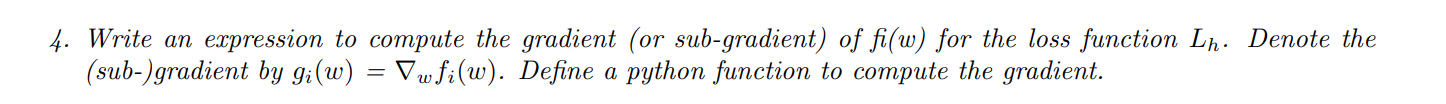

To compute the gradient of $ f_i(w) $ for the hinge loss function $ L_h(y_i, w^T x_i) $, let's first find the derivative of $ L_h $ with respect to $ w^T x_i $, denoted as $ L'_h $:

$L'_h(y_i, w^T x_i) = \frac{\partial L_h}{\partial (w^T x_i)} = \begin{cases} -y_i & \text{if } 1 - y_i w^T x_i > 0 \\ 0 & \text{otherwise} \end{cases} $

Now, let's compute the gradient of $ f_i(w) $ with respect to $ w $, denoted as $ g_i(w) $:

$g_i(w) = \frac{\partial f_i/}{\partial w} =\lambda/n \cdot( w )+ L'_h(y_i, w^T x_i) \cdot x_i/n $


In [ ]:

def compute_gradient_hinge_loss(x_i, y_i, w, lambda_val,n):

    margin = 1 - y_i *( w@x_i)
    if margin >= 0:
        loss_gradient = -y_i*x_i
    else:
        loss_gradient = 0
    regularization_gradient = (1/n)*lambda_val * w
    gradient = regularization_gradient + loss_gradient/n
    return gradient


In [ ]:
compute_gradient_hinge_loss(A[1],y[1],np.ones(A.shape[1]),0,1)

array([4.9, 3. , 1.4, 0.2])

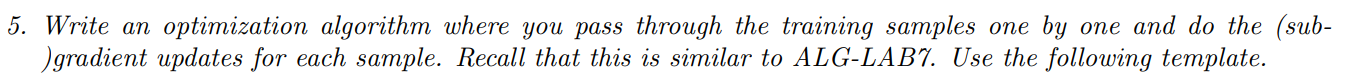

In [ ]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*compute_gradient_hinge_loss(X[i], y[i], w, lamda,n)

      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(compute_objective(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test



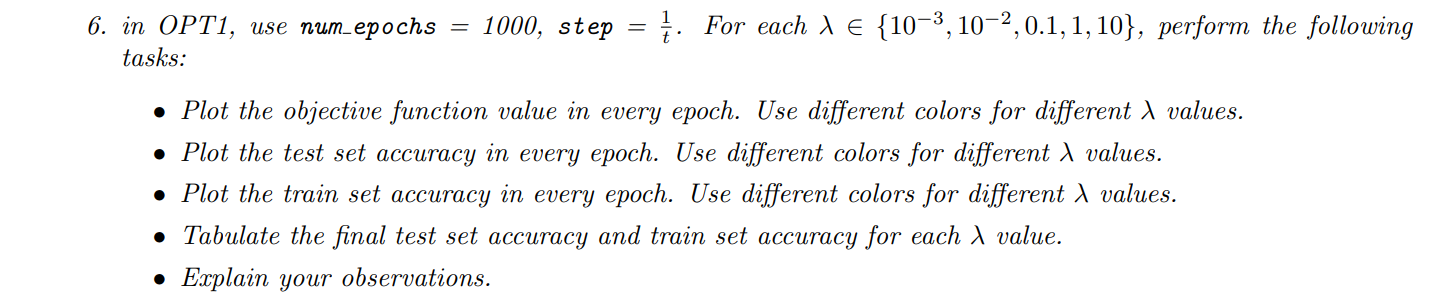

In [ ]:
import matplotlib.pyplot as plt
data= train_data
y=train_label
# print(y)
num_echos=1000
# l,z,x=OPT1(data,y,0.001,num_echos)
# print(l)
# print(z)
# print(x)


In [ ]:
# lamdas = [1e-3, 1e-2, 0.1, 1, 10]
# epochs = [i for i in range(1000)]
# i=0
# for lamda in lamdas:
#   plt.plot(epochs, test_set_accuracy_store[i], label = f'$\lambda$ = {lamda}')
#   i+=1

# # Add labels and legend
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title("Test set accuracy after every epoch for different $\lambda's$")
# plt.legend()
# plt.grid(True)
# plt.show()

[8.293010188532053, 8.157366587372087, 8.076320976973614, 8.019230579700684, 7.974428115494802, 7.937840874551406, 7.906986099642717, 7.880119831674583, 7.856493380818496, 7.835293167759118, 7.816163410652148, 7.7987117062586995, 7.782626577695598, 7.767711993180262, 7.753849973707347, 7.740885146372635, 7.728705294047073, 7.717215632191729, 7.7063505077029335, 7.696040709980464, 7.686246437337441, 7.676895300249903, 7.6679635650945315, 7.659412229598788, 7.651209995033978, 7.643335561320551, 7.635757827561028, 7.628456718918052, 7.621404070085216, 7.614591521062722, 7.608001144392181, 7.601621681089618, 7.595437783851061, 7.589436235161517, 7.583608885325372, 7.577951780421758, 7.5724465689749465, 7.567091181311627, 7.561873425094983, 7.556782986851536, 7.5518225614432515, 7.546974702889369, 7.542245538672698, 7.537627253539786, 7.533109226116249, 7.528692342629754, 7.524371920905949, 7.520140088374496, 7.515991825791422, 7.511927221632725, 7.507945639183227, 7.504043868514215, 7.5002

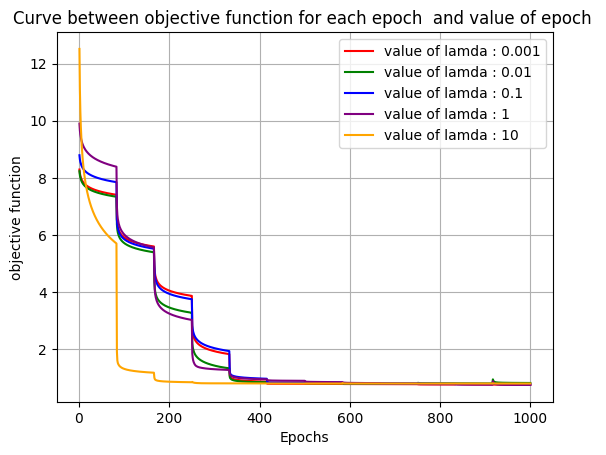

In [ ]:
lamda1=OPT1(data,y,0.001,num_echos)[1]
lamda2=OPT1(data,y,0.01,num_echos)[1]
lamda3=OPT1(data,y,0.1,num_echos)[1]
lamda4=OPT1(data,y,1,num_echos)[1]
lamda5=OPT1(data,y,10,num_echos)[1]
print(lamda1)
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('objective function')
plt.title('Curve between objective function for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

The provided `OPT1` function implements an optimization algorithm using stochastic gradient descent (SGD) to minimize the objective function, which consists of the hinge loss and a regularization term. Through a series of epochs, the function iterates over the training data, updating the weight vector based on the computed gradient of the hinge loss function for each data point. The use of an adaptive learning rate, inversely proportional to the iteration count, aids in stabilizing the optimization process and adjusting the step size as training progresses. Shuffling the data points at each epoch prevents the model from overfitting to the order of the data, promoting better generalization. Tracking the objective function and accuracy on both the training and test datasets provides valuable insights into the convergence behavior and generalization performance of the model. Furthermore, the function's flexibility allows for experimentation with different regularization parameters and optimization strategies, making it suitable for fine-tuning  

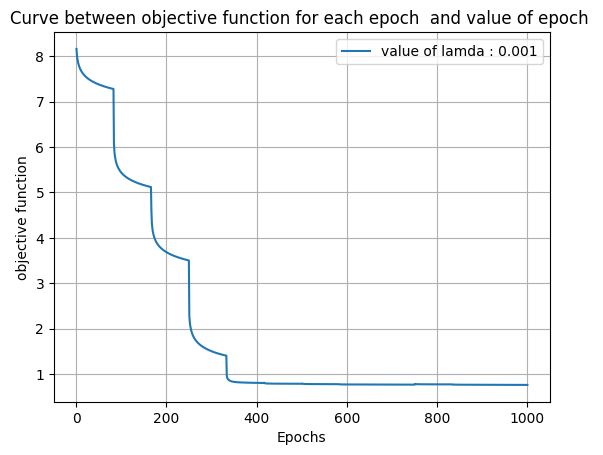

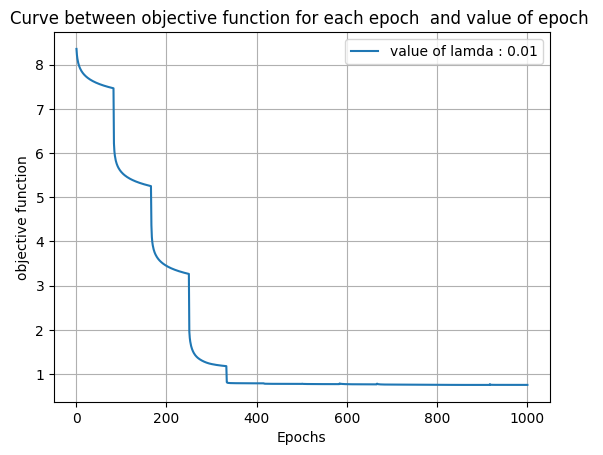

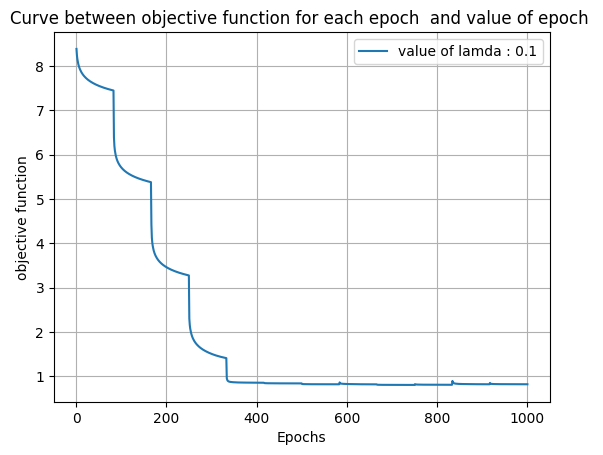

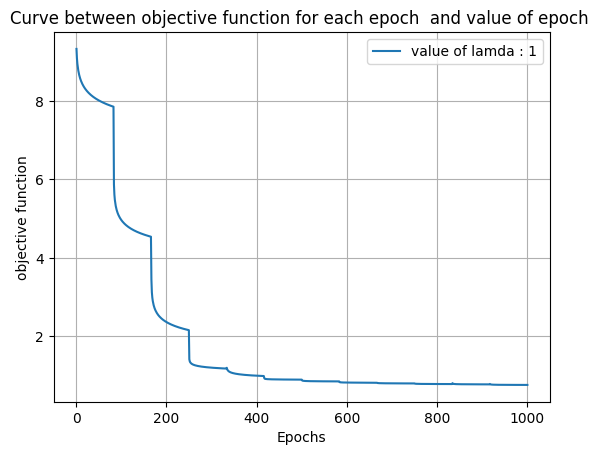

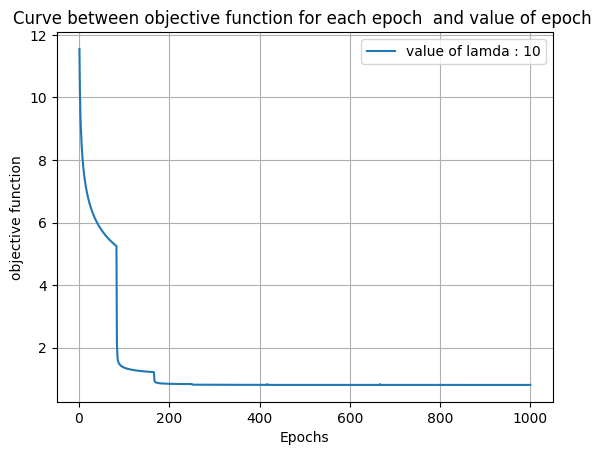

In [ ]:
# Trying to visualise the graphs to understand behaviour for different lamdas and objective functoion values
num_echos=1000
lamda_list=[1e-3,1e-2,0.1,1,10]

for lamda in lamda_list:
  data=train_data
  y=train_label
  #print((data.shape))
  w,obj,value_of_w_for_each_epoch,acc_train,acc_test=OPT1(data,y,lamda,num_echos)
  # print('norm',np.linalg.norm(w)**2)
  # print(obj)
  plt.plot([i for i in range(1,1001)],obj,label=f'value of lamda : {lamda}')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('objective function')
  plt.title('Curve between objective function for each epoch  and value of epoch ')
  plt.grid(True)
  plt.show()

Observations:

Effect of Regularization on Objective Function Value: As λ increases, the objective function value might decrease because higher regularization penalizes larger weights, leading to a simpler model.
Conversely, for smaller λ values, the objective function value might increase as the model might overfit the training data. As it has been observed that for $\lambda$ = 10, the objective function value is decreasing rapidly.


Higher λ values may result in lower train set accuracy but better generalization, leading to higher test set accuracy. This indicates better performance on unseen data.

Convergence Speed: Higher λ values might lead to faster convergence as the model avoids fitting to noise in the data. Conversely, smaller λ values might lead to slower convergence or even oscillation around the optimal solution, especially if the data is noisy or the model is complex.
 Sensitivity to Learning Rate (η): The choice of learning rate (η) is crucial. Too small a learning rate might result in slow convergence, while too large a learning rate might cause the optimization process to diverge. for which we have taken η to be 1/t.








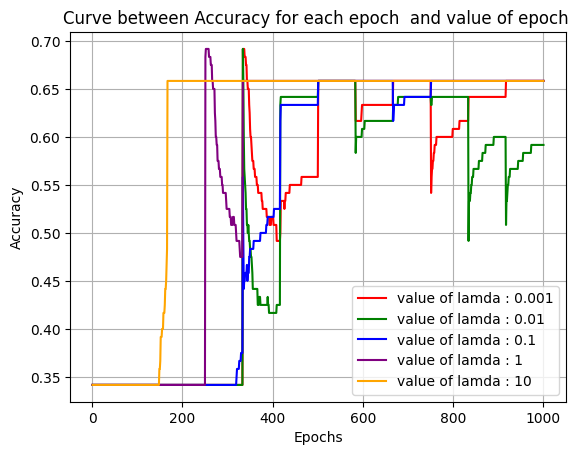

In [ ]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3]
lamda2=OPT1(data,y,0.01,num_echos)[3]
lamda3=OPT1(data,y,0.1,num_echos)[3]
lamda4=OPT1(data,y,1,num_echos)[3]
lamda5=OPT1(data,y,10,num_echos)[3]
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()


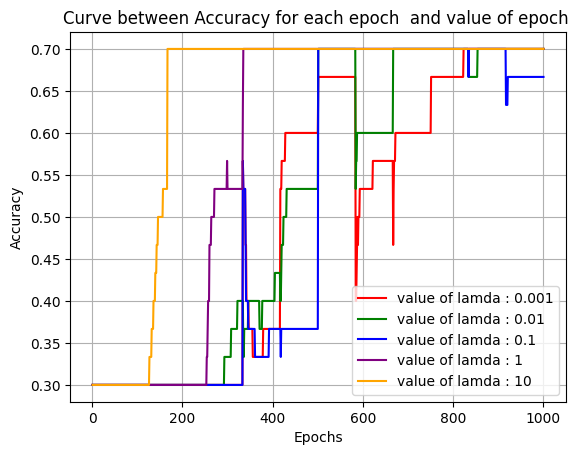

In [ ]:
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4]
lamda2=OPT1(data,y,0.01,num_echos)[4]
lamda3=OPT1(data,y,0.1,num_echos)[4]
lamda4=OPT1(data,y,1,num_echos)[4]
lamda5=OPT1(data,y,10,num_echos)[4]
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()


Train and Test Set Accuracy:
Initially, train set accuracy may increase as the model learns from the data. However, if the model starts overfitting, the train set accuracy might continue to increase while the test set accuracy might start to decrease. their is no certain relation between test accuracy and train accuracy

Generalization Performance: The goal is to achieve a balance between fitting the training data well and generalizing to unseen data. Regularization helps in achieving this balance by preventing overfitting. Observing how train and test set accuracies evolve over epochs for different λ values can provide insights into the model's generalization performance.

In [ ]:
from prettytable import PrettyTable

In [ ]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3][-1]
lamda2=OPT1(data,y,0.01,num_echos)[3][-1]
lamda3=OPT1(data,y,0.1,num_echos)[3][-1]
lamda4=OPT1(data,y,1,num_echos)[3][-1]
lamda5=OPT1(data,y,10,num_echos)[3][-1]
accuracy_train=[]
accuracy_train.extend([lamda1,lamda2,lamda3,lamda4,lamda5])

In [ ]:
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4][-1]
lamda2=OPT1(data,y,0.01,num_echos)[4][-1]
lamda3=OPT1(data,y,0.1,num_echos)[4][-1]
lamda4=OPT1(data,y,1,num_echos)[4][-1]
lamda5=OPT1(data,y,10,num_echos)[4][-1]
accuracy_test=[]
accuracy_test.extend([lamda1,lamda2,lamda3,lamda4,lamda5])

In [ ]:
print(accuracy_train)
print(accuracy_test)

[0.6333333333333333, 0.5833333333333334, 0.6583333333333333, 0.6583333333333333, 0.6583333333333333]
[0.7, 0.6666666666666666, 0.7, 0.7, 0.7]


In [ ]:
#Table for train and test accuracy
table=PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table.add_row(['0.001',accuracy_train[0],accuracy_test[0]])
table.add_row(['0.01',accuracy_train[1],accuracy_test[1]])
table.add_row(['0.1',accuracy_train[2],accuracy_test[2]])
table.add_row(['1',accuracy_train[3],accuracy_test[3]])
table.add_row(['10',accuracy_train[4],accuracy_test[4]])
print(table)

+---------------+--------------------+--------------------+
| lambda_values |   Train accuracy   |   Test accuracy    |
+---------------+--------------------+--------------------+
|     0.001     | 0.6333333333333333 |        0.7         |
|      0.01     | 0.5833333333333334 | 0.6666666666666666 |
|      0.1      | 0.6583333333333333 |        0.7         |
|       1       | 0.6583333333333333 |        0.7         |
|       10      | 0.6583333333333333 |        0.7         |
+---------------+--------------------+--------------------+


By visualisation of graph we can see that the accuracy for training data increases and decreases for different values of epochs , From graphs it is seen that it is not necessary that for large epoch we get high accuracy , their is no fix epoch for a particular lamda where we got maximum accuracy but for some lamdas it is converging to a particular lambda which is lambda = 10 and from table we cannot say that the  final value is maximum value because in between their is some values which is greater than final therefore irregularties in graph is observed here we got maximum accuracy for lambda 1 and 10 in both test and training data set.So here we can conclude that as we increse lambdas accuracy increases which we can clearly see from table

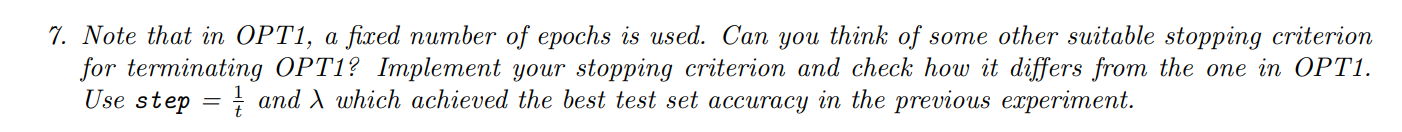

In [ ]:
data=train_data
y=train_label
lamda=1
num_echos=1000

In [ ]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  best_val_accuracy = 0  # Track the best validation accuracy
  no_improvement_count = 0# Track epochs with no improvement
  for epoch in range(num_epochs) :

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*compute_gradient_hinge_loss(X[i], y[i], w, lamda,n)

      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(compute_objective(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))
    X_val=data
    y_val=y_label
    # Evaluate on validation set
    val_accuracy = compute_accuracy(X_val, y_val, w)
    improve_factor=400
    # Check for improvement in validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
        print('best_val_accuracy:',best_val_accuracy)
        print('epoch is:',epoch)
        print("..........................................................................")
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= improve_factor:
        print(f"No improvement in validation accuracy for {improve_factor} epochs.")#here improve factor is 400 so if for consecutive 25 times their is no improvement then we say no improvement in validation accuracy.
        print('best_value_accuracy:',val_accuracy)

        print('epoch:',epoch)
        print('*************************************************************************')
        break
  print('overall best value of accuracy:',best_val_accuracy)
  return w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count


In [ ]:
#Test data
data=test_data
y_label=test_label
lamda=1#maximum accuracy for training and test data we can also choose 10
num_epochs=1000

In [ ]:
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3
epoch is: 0
..........................................................................
best_val_accuracy: 0.3333333333333333
epoch is: 255
..........................................................................
best_val_accuracy: 0.36666666666666664
epoch is: 256
..........................................................................
best_val_accuracy: 0.4
epoch is: 258
..........................................................................
best_val_accuracy: 0.43333333333333335
epoch is: 262
..........................................................................
best_val_accuracy: 0.4666666666666667
epoch is: 263
..........................................................................
best_val_accuracy: 0.5
epoch is: 267
..........................................................................
best_val_accuracy: 0.5333333333333333
epoch is: 279
..........................................................................
best_val_accuracy: 0.56666666

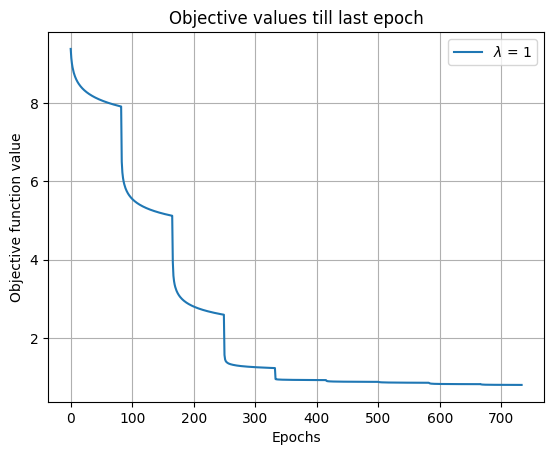

In [ ]:
epochs = [i for i in range(len(obj_fn))]
plt.plot(epochs, obj_fn, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

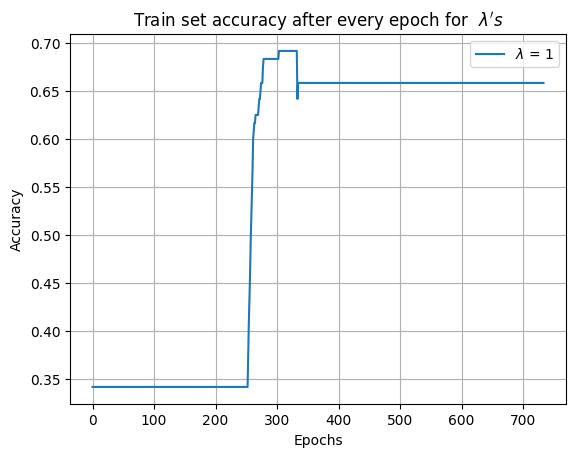

In [ ]:
epochs = [i for i in range(len(accuracy_train))]
plt.plot(epochs, accuracy_train, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train set accuracy after every epoch for  $\lambda's$")
plt.legend()
plt.grid(True)
plt.show()

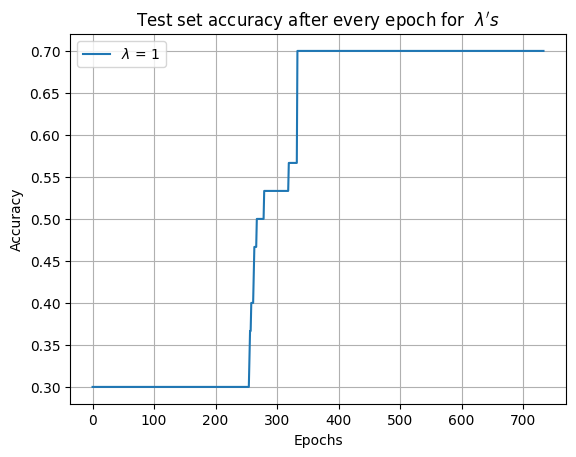

In [ ]:

epochs = [i for i in range(len(accuracy_test))]
plt.plot(epochs, accuracy_test, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for  $\lambda's$")
plt.legend()
plt.grid(True)
plt.show()

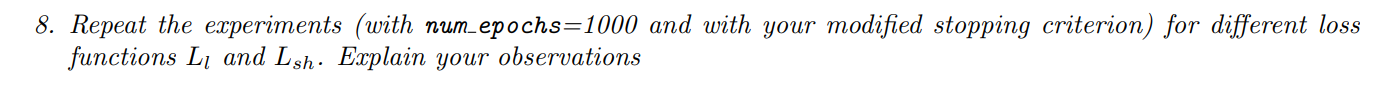

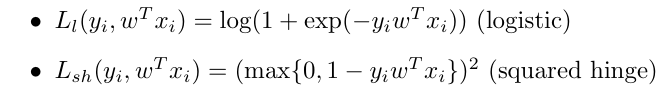

We know that $f_i(w)$ is where $L$ is $L_i$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)$$


We know that $f_i(w)$ is where $L$ is $L_{sh}$ loss

$$f_i(w)=\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)$$


In [ ]:
import numpy as np


In [ ]:
#Logistic
def logistic_loss(x,y,w):
  loss=np.log(1+np.exp(-y*(w@x)))
  return loss
def logistic_objective_function(x,y,w,lamda):
  n=x.shape[0]
  loss=0
  for i in range(n):
    loss=loss+logistic_loss(x[i],y[i],w)
  reg_term=1/2*lamda*((np.linalg.norm(w))**2)
  obj=reg_term+loss/n
  return obj


In [ ]:
logistic_objective_function(data,y,w,lamda)

0.7274402238749412

In [ ]:
#squared hinge
def squared_loss(x,y,w):
  z=y*(w@x)
  loss= max(0,1-z)
  return loss**2
def squared_objective_function(x,y,w,lamda):
  n=x.shape[0]
  loss=0
  for i in range(n):
    loss=loss+squared_loss(x[i],y[i],w)
  reg_term=1/2*lamda*((np.linalg.norm(w))**2)
  obj=reg_term+loss/n
  return obj


Now we are calculating gradient of both functions:

The logistic loss function $L_l$ is given by:
$$
L_l\left(y, w^T x\right)=\log \left(1+\exp \left(-y w^T x\right)\right)
$$

To compute the gradient (or subgradient) of $L_l$ with respect to the weight vector $w$, applying the chain rule, we have:
$$
\frac{\partial L_l}{\partial w}= \frac{1}{1+\exp \left(-y w^T x\right)}\frac{∂\exp(-yw^Tx)}{∂w} = \frac{-yx\exp(-yw^Tx)}{1+\exp \left(-y w^T x\right)}
$$

We can simplify this to:
$$
\nabla_w L_l\left(y, w^T x\right)=-y x \frac{1}{1+\exp \left(y w^T x\right)}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_l\left(y_i, w^T x_i\right)) =  \frac{\lambda w}{n} + \frac{-yx}{n(1+exp(yw^Tx))}
$$


The squared hinge loss function $L_{s h}$ is given by:
$$
L_{s h}\left(y, w^T x\right)=\left(\max \left(0,1-y w^T x\right)\right)^2
$$

The gradient (or subgradient) of $L_{s h}$ with respect to the weight vector $w$ can be calculated as follows:

$$
\nabla_w L_{sh}\left(y, w^T x\right)=
\begin{cases}
-2(1-yw^Tx)(yx) & \text { if } 1-yw^Tx \geq 0 \\
0 & \text{ if } 1-yw^Tx < 0
\end{cases}
$$


which will imply that, for the regularized version, we have:

$$
\nabla_w f_i(w)=\nabla_w (\frac{\lambda}{2n}\|w\|_2^2+\frac{1}{n} L_{sh}\left(y_i, w^T x_i\right)) =  \begin{cases} \frac{\lambda w}{n} + \frac{-2(1-yw^Tx)(yx)}{n} & \text { if } 1-yw^Tx \geq 0 \\
 \frac{\lambda w}{n} & \text { if } 1-yw^Tx < 0
\end{cases}
$$


In [ ]:
def logistic_gradient(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  loss_term=(1/n)*y*x*(1/(1+np.exp(y*(w@x))))
  return reg_term-loss_term



In [ ]:
def squared_gradient(x,y,w,lamda,n):
  reg_term=(lamda/n)*w
  z=y*(w@x)
  grad=0
  if (1-z)>0:
    grad=-2*(1-z)*y*x
  gradient=reg_term+grad/n
  return gradient

In [ ]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*logistic_gradient(X[i], y[i], w, lamda,n)

      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(logistic_objective_function(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

In [ ]:
#For Logistic hinge loss
data=train_data
y=train_label
num_echos=1000

[7.597714641113899, 7.459407830390828, 7.377393093029384, 7.3190725947302, 7.274356297023731, 7.237728030964843, 7.206597050018423, 7.179742236241028, 7.15605061040228, 7.134866557611267, 7.115740200598959, 7.098258014025464, 7.0822114974606984, 7.0673068741014635, 7.053461796385054, 7.040450836629489, 7.028269544503763, 7.016798267675521, 7.005942561712343, 6.9956538164160635, 6.985846711008773, 6.976493346640038, 6.967565230729792, 6.95900826904783, 6.950816161354616, 6.94294821203078, 6.93536794127273, 6.928066013493783, 6.921016816042277, 6.914208750401079, 6.907621903255241, 6.901242396495675, 6.895060484008529, 6.889064359615774, 6.88324037509398, 6.877577782346679, 6.87206970027735, 6.8667110639668, 6.861488213045081, 6.856398146136034, 6.851439789441778, 6.84660662439183, 6.841881912374105, 6.837265292403503, 6.832750865590143, 6.828340246700367, 6.824024845362452, 6.819799119708941, 6.815657432650722, 6.811598470163179, 6.807621244379206, 6.8037187538669315, 6.799893305244154,

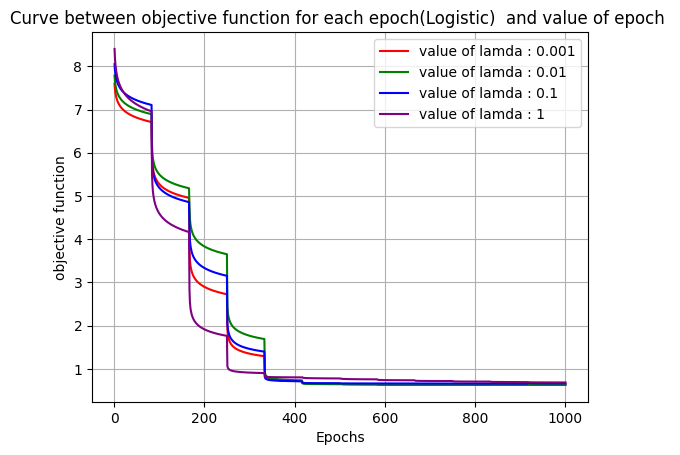

In [ ]:
lamda1=OPT1(data,y,0.001,num_echos)[1]
lamda2=OPT1(data,y,0.01,num_echos)[1]
lamda3=OPT1(data,y,0.1,num_echos)[1]
lamda4=OPT1(data,y,1,num_echos)[1]
lamda5=OPT1(data,y,10,num_echos)[1]
print(lamda1)
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('objective function')
plt.title('Curve between objective function for each epoch(Logistic)  and value of epoch ')
plt.grid(True)
plt.show()

In [ ]:
# lamdas = [1e-3, 1e-2, 0.1, 1, 10]

# i=0
# for lamda in lamdas:
#   epochs = [i for i in range(1,1001)]

#   plt.plot(epochs, OPT1(data,y,lamda,num_echos)[1], label = f'$\lambda$ = {lamda}')
#   i+=1

# # Add labels and legend

# plt.xlabel('Epochs')
# plt.ylabel('Objective function value')
# plt.title("Comparison of Objective value of f(x) w.r.t. different $\lambda's$ for logistic loss")
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3]
lamda2=OPT1(data,y,0.01,num_echos)[3]
lamda3=OPT1(data,y,0.1,num_echos)[3]
lamda4=OPT1(data,y,1,num_echos)[3]
lamda5=OPT1(data,y,10,num_echos)[3]
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

In [ ]:
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4]
lamda2=OPT1(data,y,0.01,num_echos)[4]
lamda3=OPT1(data,y,0.1,num_echos)[4]
lamda4=OPT1(data,y,1,num_echos)[4]
lamda5=OPT1(data,y,10,num_echos)[4]
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

In [ ]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3][-1]
lamda2=OPT1(data,y,0.01,num_echos)[3][-1]
lamda3=OPT1(data,y,0.1,num_echos)[3][-1]
lamda4=OPT1(data,y,1,num_echos)[3][-1]
lamda5=OPT1(data,y,10,num_echos)[3][-1]
accuracy_train=[]
accuracy_train.extend([lamda1,lamda2,lamda3,lamda4,lamda5])

In [ ]:
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4][-1]
lamda2=OPT1(data,y,0.01,num_echos)[4][-1]
lamda3=OPT1(data,y,0.1,num_echos)[4][-1]
lamda4=OPT1(data,y,1,num_echos)[4][-1]
lamda5=OPT1(data,y,10,num_echos)[4][-1]
accuracy_test=[]
accuracy_test.extend([lamda1,lamda2,lamda3,lamda4,lamda5])

In [ ]:
#Table for train and test accuracy
table=PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table.add_row(['0.001',accuracy_train[0],accuracy_test[0]])
table.add_row(['0.01',accuracy_train[1],accuracy_test[1]])
table.add_row(['0.1',accuracy_train[2],accuracy_test[2]])
table.add_row(['1',accuracy_train[3],accuracy_test[3]])
table.add_row(['10',accuracy_train[4],accuracy_test[4]])
print(table)

+---------------+--------------------+---------------------+
| lambda_values |   Train accuracy   |    Test accuracy    |
+---------------+--------------------+---------------------+
|     0.001     | 0.5583333333333333 |  0.6666666666666666 |
|      0.01     | 0.6166666666666667 |  0.5333333333333333 |
|      0.1      | 0.6333333333333333 | 0.36666666666666664 |
|       1       | 0.6583333333333333 |         0.7         |
|       10      | 0.6583333333333333 |         0.7         |
+---------------+--------------------+---------------------+


###Modified Criteria For Logistic:###

In [ ]:
data=train_data
y=train_label
lamda=10 #maximum accuracy at this lambda for logistic hinge loss
num_echos=1000

In [ ]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  best_val_accuracy = 0  # Track the best validation accuracy
  no_improvement_count = 0# Track epochs with no improvement
  for epoch in range(num_epochs) :

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*logistic_gradient(X[i], y[i], w, lamda,n)

      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(logistic_objective_function(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))
    X_val=data
    y_val=y_label
    # Evaluate on validation set
    val_accuracy = compute_accuracy(X_val, y_val, w)
    improve_factor=400
    # Check for improvement in validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
        print('best_val_accuracy:',best_val_accuracy)
        print('epoch is:',epoch)
        print("..........................................................................")
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= improve_factor:
        print(f"No improvement in validation accuracy for {improve_factor} epochs.")#here improve factor is 400 so if for consecutive 25 times their is no improvement then we say no improvement in validation accuracy.
        print('best_value_accuracy:',val_accuracy)

        print('epoch:',epoch)
        print('*************************************************************************')
        break
  print('overall best value of accuracy:',best_val_accuracy)
  return w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count

In [ ]:
#Test data
data=test_data
y_label=test_label
lamda=10 #maximum accuracy for training and test data we can also choose 10
num_epochs=1000

In [ ]:
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.3
epoch is: 0
..........................................................................
best_val_accuracy: 0.4
epoch is: 166
..........................................................................
best_val_accuracy: 0.6333333333333333
epoch is: 167
..........................................................................
best_val_accuracy: 0.7
epoch is: 168
..........................................................................
No improvement in validation accuracy for 400 epochs.
best_value_accuracy: 0.7
epoch: 568
*************************************************************************
overall best value of accuracy: 0.7


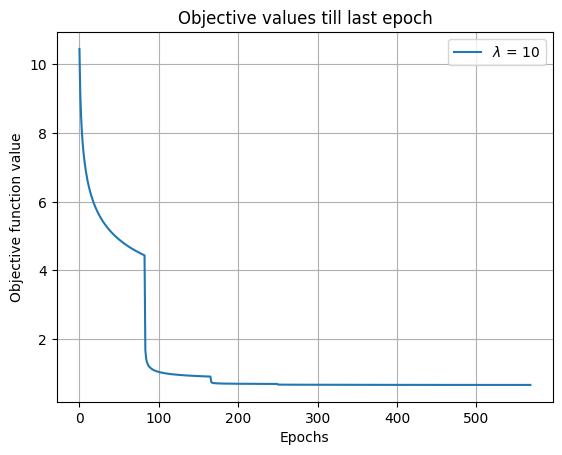

In [ ]:
epochs = [i for i in range(len(obj_fn))]
plt.plot(epochs, obj_fn, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

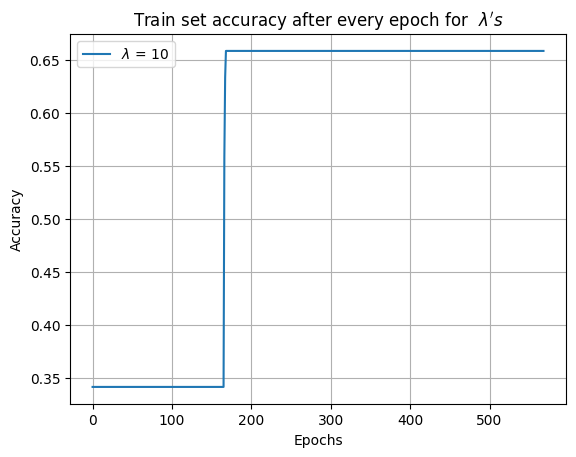

In [ ]:
epochs = [i for i in range(len(accuracy_train))]
plt.plot(epochs, accuracy_train, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

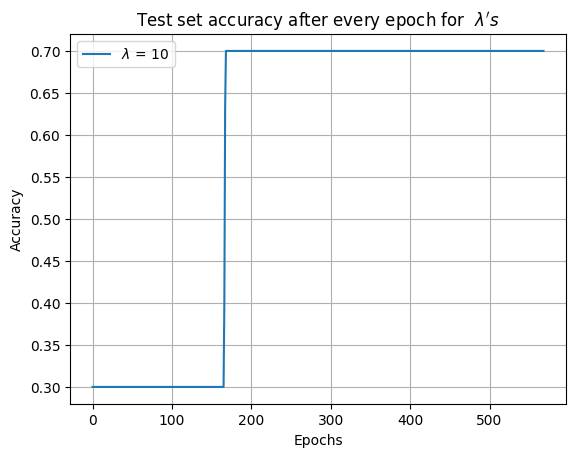

In [ ]:
#test accuracy
epochs = [i for i in range(len(accuracy_test))]
plt.plot(epochs, accuracy_test, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

###obseravation:###
By observing graph same  observation we made for our OPT1 like convergence relation with lamdas and epochs  but the difference in logistic observed is their is almost same trend of objective function value decrement as epoch increases for all lambdas and in this we get peak aaccuracy earlier than hinge loss as observing graphs of both clearly visualised after changing the alg0. using best value algo we get a symmetric curve for both train and test data whereas in hinge loss we get irregular troughs  in graph.

##Squared loss:

In [ ]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  for epoch in range(num_epochs) :
    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*squared_gradient(X[i], y[i], w, lamda,n)

      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(squared_objective_function(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))

  return w ,obj_fn,value_of_w,accuracy_train,accuracy_test

In [ ]:
#For Squared hinge loss
data=train_data
print(data.shape)
y=train_label
num_echos=1000

(120, 4)


[1.2529909972499491, 1.199134584755714, 1.1840279901732138, 1.176171016514139, 1.171029923165277, 1.1672455219506601, 1.1642266721850913, 1.161731891451883, 1.1596036474622133, 1.1577528408695674, 1.1560966936689816, 1.1546226233547108, 1.1532822683977741, 1.152057231838413, 1.150929858864864, 1.1498801128171159, 1.1489038722607232, 1.1479878361597036, 1.1471279131022998, 1.146315120790158, 1.1455480205964428, 1.144820358574367, 1.1441276860520893, 1.1434660815442108, 1.142835906278163, 1.1422304293387453, 1.1416495582804054, 1.1410919436109535, 1.1405562645635572, 1.1400405590863643, 1.13954312317369, 1.1390634087500966, 1.1385988824570388, 1.138149267204638, 1.137713872895187, 1.1372920052928754, 1.1368827378031936, 1.1364855843096808, 1.1360992170470212, 1.135723130675269, 1.1353572766883249, 1.1350001506061012, 1.1346522253888154, 1.1343128841621697, 1.133981972070145, 1.1336584802197276, 1.1333431186966811, 1.1330349550645429, 1.1327335743645772, 1.1324385001408646, 1.132150204603

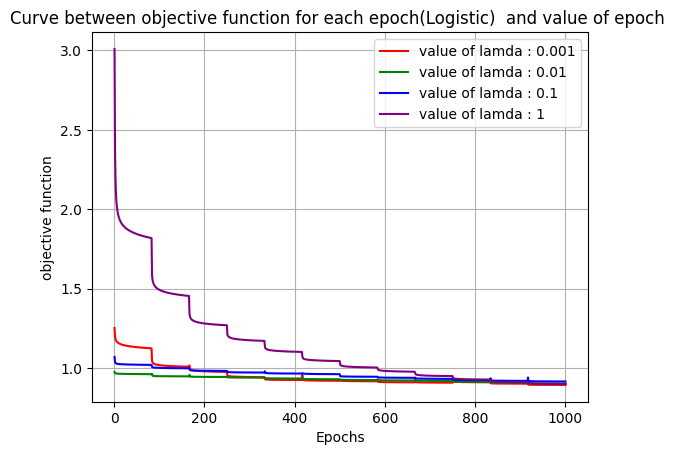

In [ ]:
lamda1=OPT1(data,y,0.001,num_echos)[1]
lamda2=OPT1(data,y,0.01,num_echos)[1]
lamda3=OPT1(data,y,0.1,num_echos)[1]
lamda4=OPT1(data,y,1,num_echos)[1]
lamda5=OPT1(data,y,10,num_echos)[1]
print(lamda1)
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
#plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('objective function')
plt.title('Curve between objective function for each epoch(Logistic)  and value of epoch ')
plt.grid(True)
plt.show()

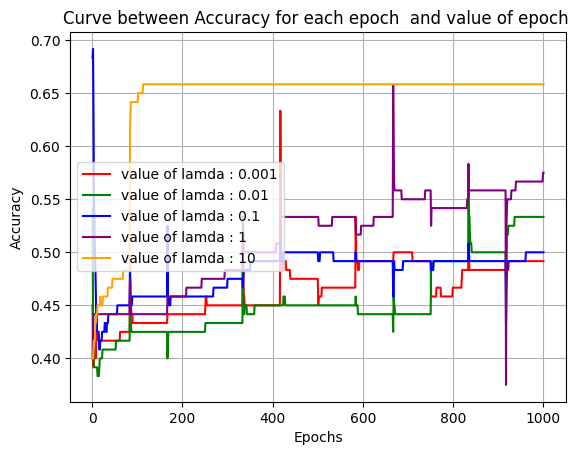

In [ ]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3]
lamda2=OPT1(data,y,0.01,num_echos)[3]
lamda3=OPT1(data,y,0.1,num_echos)[3]
lamda4=OPT1(data,y,1,num_echos)[3]
lamda5=OPT1(data,y,10,num_echos)[3]
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

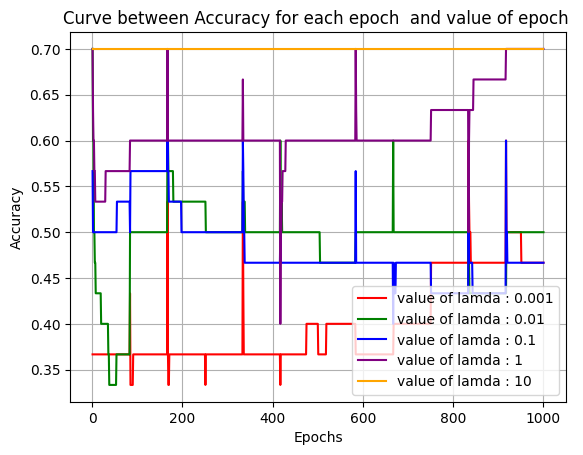

In [ ]:
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4]
lamda2=OPT1(data,y,0.01,num_echos)[4]
lamda3=OPT1(data,y,0.1,num_echos)[4]
lamda4=OPT1(data,y,1,num_echos)[4]
lamda5=OPT1(data,y,10,num_echos)[4]
plt.plot([i for i in range(1,1001)],lamda1,color='red',label=f'value of lamda : {0.001}')
plt.plot([i for i in range(1,1001)],lamda2,color='green',label=f'value of lamda : {0.01}')
plt.plot([i for i in range(1,1001)],lamda3,color='blue',label=f'value of lamda : {0.1}')
plt.plot([i for i in range(1,1001)],lamda4,color='purple',label=f'value of lamda : {1}')
plt.plot([i for i in range(1,1001)],lamda5,color='orange',label=f'value of lamda : {10}')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curve between Accuracy for each epoch  and value of epoch ')
plt.grid(True)
plt.show()

In [ ]:
#train data
data=train_data
y=train_label
lamda1=OPT1(data,y,0.001,num_echos)[3][-1]
lamda2=OPT1(data,y,0.01,num_echos)[3][-1]
lamda3=OPT1(data,y,0.1,num_echos)[3][-1]
lamda4=OPT1(data,y,1,num_echos)[3][-1]
lamda5=OPT1(data,y,10,num_echos)[3][-1]
accuracy_train=[]
accuracy_train.extend([lamda1,lamda2,lamda3,lamda4,lamda5])
#test_data
data=test_data
y=test_label
lamda1=OPT1(data,y,0.001,num_echos)[4][-1]
lamda2=OPT1(data,y,0.01,num_echos)[4][-1]
lamda3=OPT1(data,y,0.1,num_echos)[4][-1]
lamda4=OPT1(data,y,1,num_echos)[4][-1]
lamda5=OPT1(data,y,10,num_echos)[4][-1]
accuracy_test=[]
accuracy_test.extend([lamda1,lamda2,lamda3,lamda4,lamda5])

In [ ]:
#Table for train and test accuracy
table=PrettyTable(['lambda_values','Train accuracy','Test accuracy'])
table.add_row(['0.001',accuracy_train[0],accuracy_test[0]])
table.add_row(['0.01',accuracy_train[1],accuracy_test[1]])
table.add_row(['0.1',accuracy_train[2],accuracy_test[2]])
table.add_row(['1',accuracy_train[3],accuracy_test[3]])
table.add_row(['10',accuracy_train[4],accuracy_test[4]])
print(table)

+---------------+--------------------+---------------------+
| lambda_values |   Train accuracy   |    Test accuracy    |
+---------------+--------------------+---------------------+
|     0.001     |        0.5         | 0.43333333333333335 |
|      0.01     | 0.5166666666666667 |  0.4666666666666667 |
|      0.1      | 0.5333333333333333 |  0.4666666666666667 |
|       1       | 0.6416666666666667 |         0.7         |
|       10      | 0.6583333333333333 |         0.7         |
+---------------+--------------------+---------------------+


##Observation Regarding Algo##
1. **Convergence Speed**:
   - Squared loss converges faster and achieves the best accuracy in fewer epochs compared to logistic and hinge losses.
   - Logistic loss converges relatively faster compared to hinge loss, indicating that logistic regression may adapt more quickly to the training data.

2. **Effect of Regularization**:
   - For larger values of lambda, the difference in accuracy between squared loss and logistic/hinge losses diminishes. This suggests that regularization plays a more significant role in improving performance for squared loss compared to logistic and hinge losses.

3. **Model Sensitivity**:
   - Squared loss appears to be more sensitive to the initialization of the weight vector ('w'). Peaks in accuracy are observed for rare values of 'w', indicating that small variations in the initial weights can have a significant impact on model performance.

4. **Generalization**:
   - Despite achieving peak accuracy early, squared loss may suffer from decreased generalization performance compared to logistic and hinge losses. This is evident from the observation that accuracy decreases for squared loss compared to logistic and hinge losses, especially for larger values of lambda.

5. **Loss Function Behavior**:
   - The squared loss function exhibits a smoother curve compared to logistic and hinge losses, indicating that it may be less affected by outliers in the data.
   - Logistic loss shows a more pronounced sigmoid shape, while hinge loss displays a more linear behavior with abrupt changes at the decision boundary.

6. **Optimal Lambda Selection**:
   - The optimal choice of lambda may vary depending on the loss function used. Squared loss may require a different lambda value for achieving the best accuracy compared to logistic and hinge losses.

7. **Trade-off between Bias and Variance**:
   - Squared loss, with its emphasis on reducing the square of the error, may result in lower bias but higher variance compared to logistic and hinge losses. This trade-off should be considered when selecting the appropriate loss function for a given problem.



##Modified Criteria for Squared loss:


In [ ]:
data=train_data
y=train_label
lamda=10 #maximum accuracy at this lambda for logistic hinge loss or we may use lamda=1
num_echos=1000

In [ ]:
def OPT1( data , y_label ,lamda , num_epochs ) :
  t = 1
  n=train_data.shape[0]
  X=train_data
  y=train_label
  d=((train_data).shape[1])

  # initialize w
  w = np .ones(( d ,1) ).flatten()
  arr = np.arange(train_data.shape[0])
  obj_fn=[]
  value_of_w=[]
  accuracy_train=[]
  accuracy_test=[]
  best_val_accuracy = 0  # Track the best validation accuracy
  no_improvement_count = 0# Track epochs with no improvement
  for epoch in range(num_epochs) :

    np . random . shuffle ( arr ) # shuffle every epoch
    for i in np.nditer( arr ) : # Pass through the data points
      step = 1/t
      # Update w using w <- w - step * g_i (w)
      w=w-step*squared_gradient(X[i], y[i], w, lamda,n)

      t=t+1
      if t >1e4 :
        t = 1
    obj_fn.append(squared_objective_function(X,y,w,lamda))
    value_of_w.append(w)
    accuracy_train.append(compute_accuracy(X,y,w))
    accuracy_test.append(compute_accuracy(data,y_label,w))
    X_val=data
    y_val=y_label
    # Evaluate on validation set
    val_accuracy = compute_accuracy(X_val, y_val, w)
    improve_factor=400
    # Check for improvement in validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        no_improvement_count = 0
        print('best_val_accuracy:',best_val_accuracy)
        print('epoch is:',epoch)
        print("..........................................................................")
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= improve_factor:
        print(f"No improvement in validation accuracy for {improve_factor} epochs.")#here improve factor is 400 so if for consecutive 25 times their is no improvement then we say no improvement in validation accuracy.
        print('best_value_accuracy:',val_accuracy)

        print('epoch:',epoch)
        print('*************************************************************************')
        break
  print('overall best value of accuracy:',best_val_accuracy)
  return w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count

In [ ]:
#Test data
data=test_data
y_label=test_label
lamda=10#maximum accuracy for training and test data we can also choose 10
num_epochs=1000

In [ ]:
w, obj_fn, value_of_w, accuracy_train,accuracy_test,best_val_accuracy,no_improvement_count=OPT1( data , y_label ,lamda , num_epochs )

best_val_accuracy: 0.7
epoch is: 0
..........................................................................
No improvement in validation accuracy for 400 epochs.
best_value_accuracy: 0.7
epoch: 400
*************************************************************************
overall best value of accuracy: 0.7


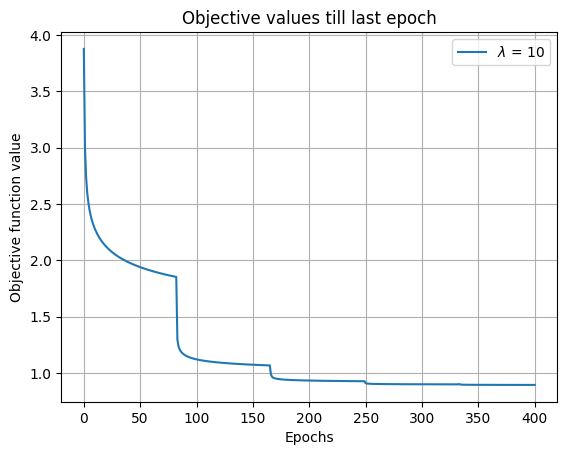

In [ ]:
epochs = [i for i in range(len(obj_fn))]
plt.plot(epochs, obj_fn, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Objective function value')
plt.title("Objective values till last epoch")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
epochs = [i for i in range(len(accuracy_train))]
plt.plot(epochs, accuracy_train, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Train set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

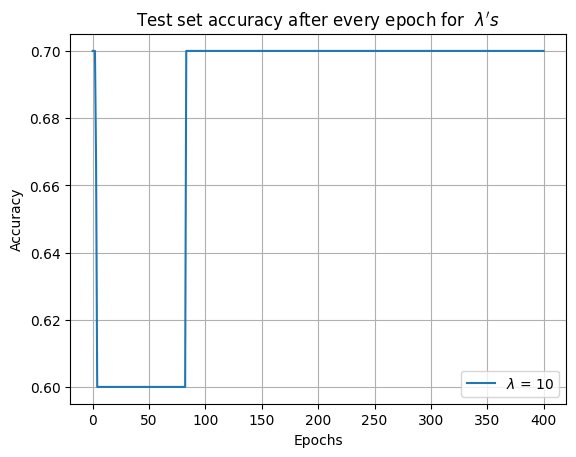

In [ ]:
epochs = [i for i in range(len(accuracy_test))]
plt.plot(epochs, accuracy_test, label = f'$\lambda$ = {lamda}')

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Test set accuracy after every epoch for  $\lambda$")
plt.legend()
plt.grid(True)
plt.show()

###Observation:###
In squared loss the objective value is lowest intially in compare of other two , the curve look like negative exponential as their are some irregularities but less than others on the other hand the curves for each lamdas looks similar but not as in logistic and remaining all observation are almost similar like realtion of decrement of objective value with each epoch for different lambdas , In this the intial decrement is larger among all three losses which observed from graph and In sense of accuracy, the accuracy decreases in squared loss for this method in comparision of other but for larger lamdas its almost similar , one more thing observed that for rare value of 'w' we get peak acccuracy the curve move downwards.After applying our updated method we get peak under 100 in this case after that didnot improve more therefore squared loss gets peak more early than the two others.

so, we say squared loss is at first position to get best value accuracy in less number of epoch (less than 100) for logistic its between (100-200)
and for hinge loss in between 200-400. for different lambdas .